In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv(r'C:\Users\rjhcl\Desktop\avacado project\avocado.csv')

In [61]:
# deleting the null values(rows)
df = df[:1516]

In [62]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,9.0,23-10-2016,1.52,167741.27,54981.90,39749.81,20290.31,52719.25,47060.46,5658.79,0.00,conventional,2016.0,Charlotte
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte


In [63]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [64]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1511,9.0,23-10-2016,1.52,167741.27,54981.90,39749.81,20290.31,52719.25,47060.46,5658.79,0.00,conventional,2016.0,Charlotte
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [65]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1516.000000,1516.000000,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1516.000000,1516.000000
mean,27.003958,1.074756,1.602815e+06,6.468366e+05,6.118051e+05,5.042782e+04,2.937455e+05,2.488998e+05,4.266249e+04,2183.210237,2015.162269
std,14.849431,0.188733,4.434456e+06,1.948195e+06,1.673397e+06,1.378240e+05,7.582047e+05,6.476715e+05,1.182520e+05,7457.961586,0.368819
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.977500,1.474583e+05,2.037795e+04,4.147423e+04,9.070825e+02,3.619777e+04,2.971965e+04,5.379375e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.035468e+05,8.208386e+04,1.189817e+05,7.670935e+03,7.409224e+04,6.240528e+04,5.027430e+03,0.000000,2015.000000
75%,39.250000,1.190000,9.824590e+05,3.778713e+05,4.852986e+05,2.927145e+04,1.576887e+05,1.462548e+05,2.937044e+04,403.130000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [66]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [67]:
# dropping unnamed:0 column as it is s.no
df.drop("Unnamed: 0",axis=1,inplace=True)

In [68]:
# creating dummies(into 0 and 1)
df=pd.get_dummies(df,columns=['type',],drop_first=True)

In [91]:
LE=LabelEncoder()
df['AveragePrice']=LE.fit_transform(df['AveragePrice'])

In [92]:
df.isnull().sum()
# no null values

Date            0
AveragePrice    0
Total Volume    0
SM              0
LA              0
XLA             0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

In [93]:
df_cor=df.corr()
# correlation

<AxesSubplot:>

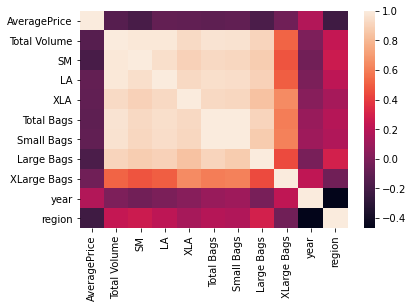

In [94]:
sns.heatmap(df.corr())
# heatmap of data correlation

In [95]:
# renaming few columns as they are confusing
df.rename(columns={'4046':'SM','4225':'LA','4770':'XLA'},inplace=True)

# checking the data distribution

<AxesSubplot:xlabel='The Average Price', ylabel='Density'>

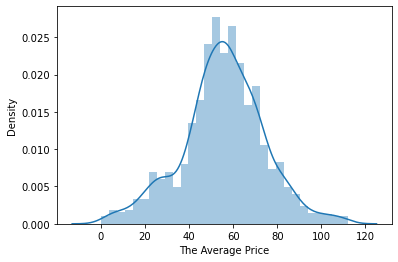

In [96]:
sns.distplot(df['AveragePrice'],axlabel="The Average Price")

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

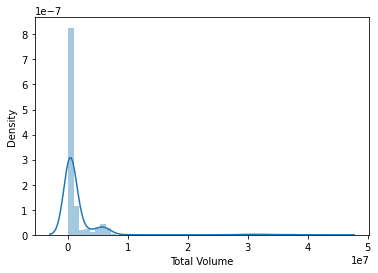

In [97]:
sns.distplot(df['Total Volume'],axlabel="Total Volume")

<AxesSubplot:xlabel='SM', ylabel='Density'>

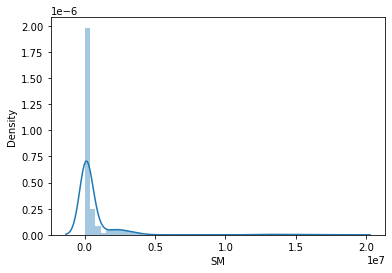

In [98]:
sns.distplot(df['SM'],axlabel="SM")

<AxesSubplot:xlabel='LA', ylabel='Density'>

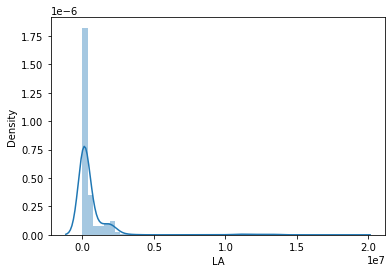

In [99]:
sns.distplot(df['LA'],axlabel="LA")

<AxesSubplot:xlabel='XLA', ylabel='Density'>

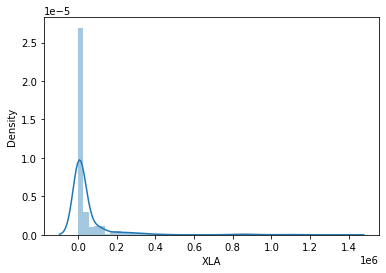

In [100]:
sns.distplot(df['XLA'],axlabel="XLA")

<AxesSubplot:xlabel='total bags', ylabel='Density'>

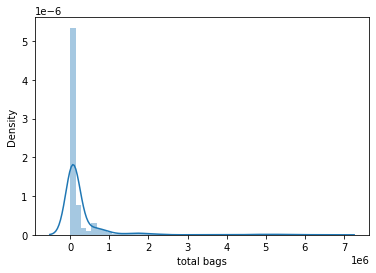

In [101]:
sns.distplot(df['Total Bags'],axlabel="total bags")

<AxesSubplot:xlabel='small bags', ylabel='Density'>

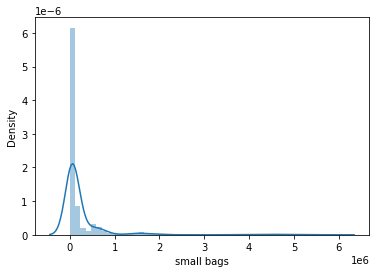

In [102]:
sns.distplot(df['Small Bags'],axlabel="small bags")

<AxesSubplot:xlabel='large bags', ylabel='Density'>

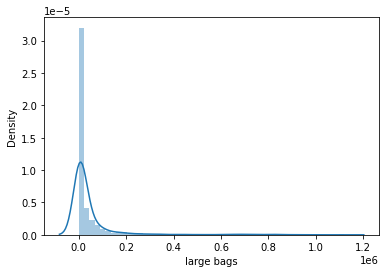

In [103]:
sns.distplot(df['Large Bags'],axlabel="large bags")

<AxesSubplot:xlabel='Xlarge bags', ylabel='Density'>

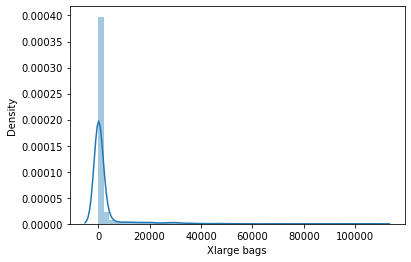

In [104]:
sns.distplot(df['XLarge Bags'],axlabel="Xlarge bags")

<AxesSubplot:xlabel='year', ylabel='Density'>

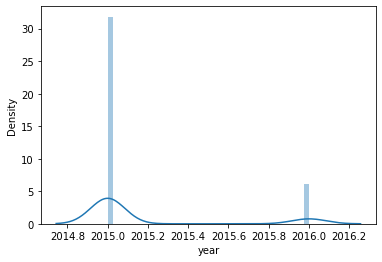

In [105]:
sns.distplot(df['year'],axlabel="year")

<AxesSubplot:xlabel='region', ylabel='Density'>

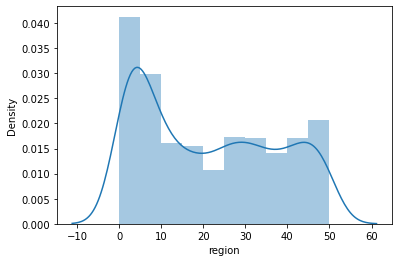

In [106]:
sns.distplot(df['region'],axlabel="region")

In [107]:
# creating new data with needed columns(as these are all very correlated to price)
df_new=df[["AveragePrice","Total Volume","region","Total Bags","year"]]

In [108]:
X=df_new.drop(['AveragePrice'],axis=1)

In [109]:
y = df_new['AveragePrice']

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [114]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)

In [116]:
print(accuracy_score(y_test,pred_tree))
print(confusion_matrix(y_test,pred_tree))
print(classification_report(y_test,pred_tree))

0.05592105263157895
[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00      

In [118]:
knn = knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)

In [119]:
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

0.023026315789473683
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00     

In [120]:
# lets use decision tree as it gave more accuracy
import pickle
pickle.dump(tree, open('model.pkl', 'wb'))